# Classification

# Connecting to Google Drive

In [1]:
import sys
from google.colab import drive

drive.mount('/content/drive')
path_nb = r'/content/drive/My Drive/mow2/'
sys.path.append(path_nb)

Mounted at /content/drive


# Loading the dataset

In [ ]:
import pandas as pd
from sklearn import preprocessing

data = pd.read_csv(path_nb +'milknew.csv')
data.Grade = pd.factorize(data.Grade)[0]

print(data) 

       pH  Temprature  Taste  Odor  Fat   Turbidity  Colour  Grade
0     6.6          35      1     0     1          0     254      0
1     6.6          36      0     1     0          1     253      0
2     8.5          70      1     1     1          1     246      1
3     9.5          34      1     1     0          1     255      1
4     6.6          37      0     0     0          0     255      2
...   ...         ...    ...   ...   ...        ...     ...    ...
1054  6.7          45      1     1     0          0     247      2
1055  6.7          38      1     0     1          0     255      0
1056  3.0          40      1     1     1          1     255      1
1057  6.8          43      1     0     1          0     250      0
1058  8.6          55      0     1     1          1     255      1

[1059 rows x 8 columns]


Dataset contains 7 featurtes: 

*   pH - pH of milk 
*   Temperature - temperature of milk
*   Taste - taste of milk (binary variable) 
*   Odor - smell of milk (binary variable) 
*   Fat - is milk fat (binary variable) 
*   Turbidity - turbidity of milk (binary variable) 
*   Colour - colour of milk


# Data description

In [ ]:
data.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415,1.111426
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424,0.763568
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000,0.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000,1.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000,1.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000,2.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000,2.000000


# Charts

## Box-plots

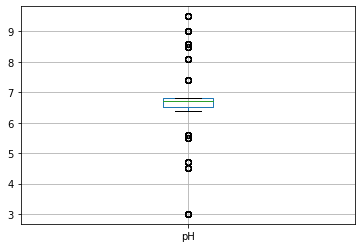

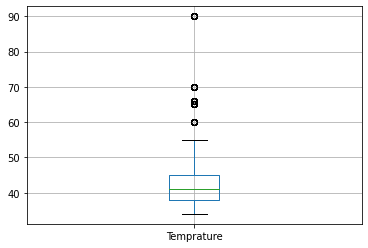

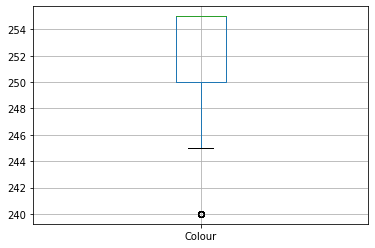

In [ ]:
import matplotlib.pyplot as plt

for column in data[['pH','Temprature','Colour']]:
    plt.figure()
    data.boxplot([column])

## Histograms

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f494475d490>,
      dtype=object)

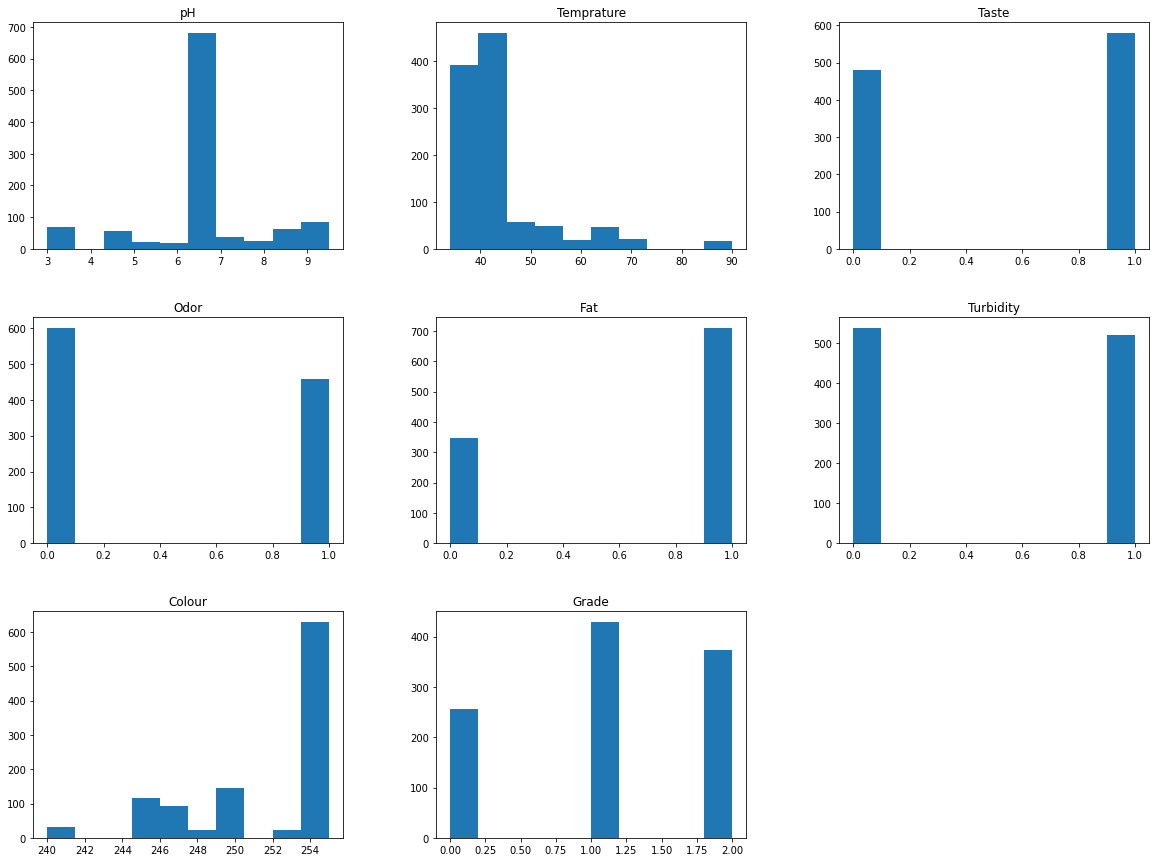

In [ ]:
data.hist(figsize=(20,15),grid = False)

## Pairplots

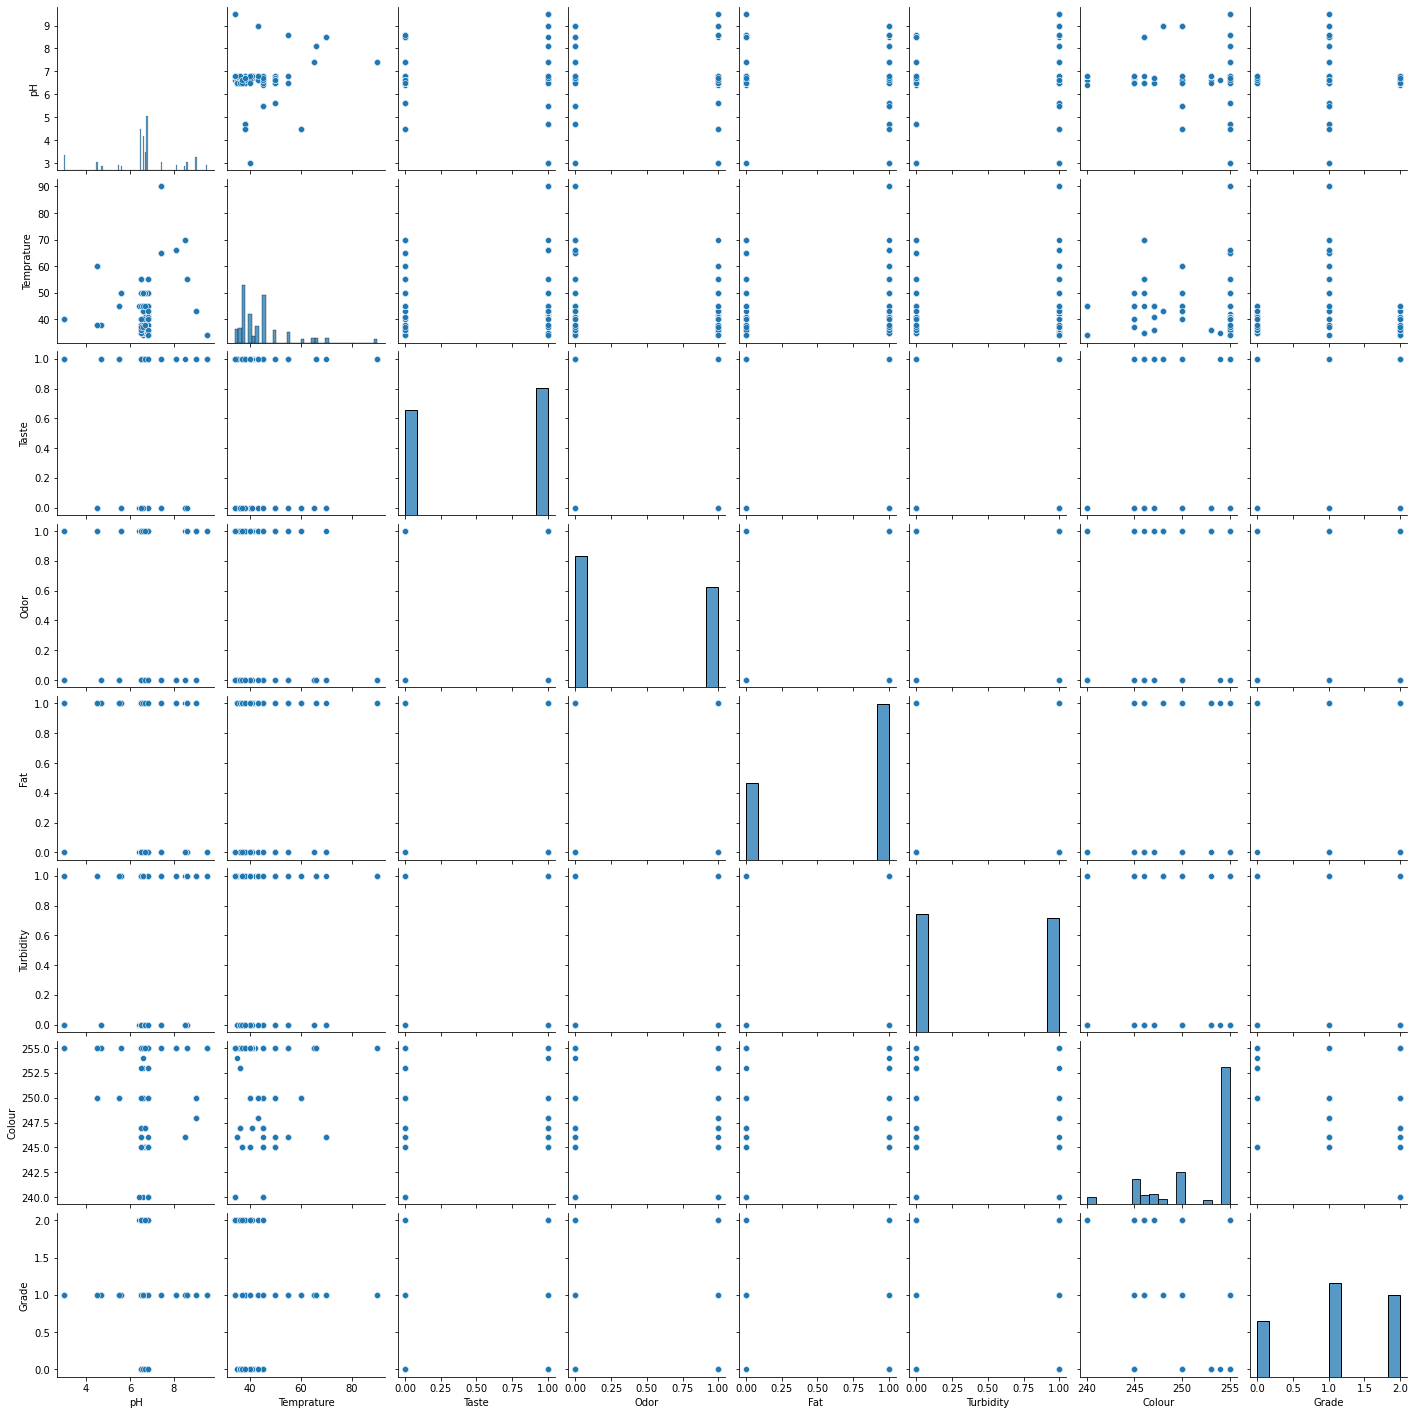

In [ ]:
import seaborn as sns

sns.pairplot(data)
plt.show()

## Scatterplot

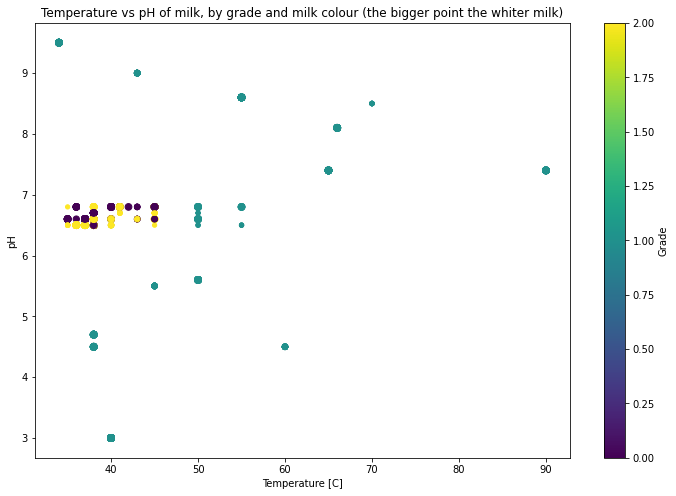

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
scatter = plt.scatter( x=data.Temprature,y=data.pH,s=(data.Colour-240)*3,c=data.Grade,)

plt.title("Temperature vs pH of milk, by grade and milk colour (the bigger point the whiter milk)")
plt.xlabel("Temperature [C]")
plt.ylabel("pH")

plt.colorbar(label='Grade')

plt.show()

## Correlation matrix

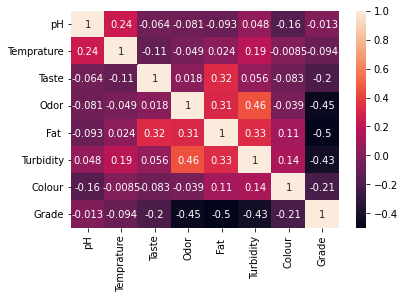

In [ ]:
corrMatrix = data.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

# Missing data

In [ ]:
data.isnull().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

## Removing 10% of data

In [ ]:
import numpy as np

for col in data.columns.drop('Grade'):
    data.loc[data.sample(frac=0.1).index, col] = np.nan

In [ ]:
data.isnull().sum()

pH            106
Temprature    106
Taste         106
Odor          106
Fat           106
Turbidity     106
Colour        106
Grade           0
dtype: int64

In [ ]:
print(data)

       pH  Temprature  Taste  Odor  Fat   Turbidity  Colour  Grade
0     6.6        35.0    1.0   0.0   1.0        0.0   254.0      0
1     6.6         NaN    0.0   NaN   0.0        NaN   253.0      0
2     8.5        70.0    NaN   1.0   1.0        1.0   246.0      1
3     9.5        34.0    1.0   1.0   0.0        1.0   255.0      1
4     6.6        37.0    0.0   0.0   0.0        0.0   255.0      2
...   ...         ...    ...   ...   ...        ...     ...    ...
1054  6.7        45.0    1.0   NaN   0.0        0.0   247.0      2
1055  6.7        38.0    1.0   0.0   1.0        NaN   255.0      0
1056  NaN        40.0    1.0   NaN   1.0        1.0   255.0      1
1057  6.8        43.0    1.0   0.0   1.0        0.0   250.0      0
1058  8.6        55.0    0.0   1.0   1.0        1.0   255.0      1

[1059 rows x 8 columns]


# Working with missing data

## Filling in missing data by mode



In [ ]:
data_mode = data.copy()

data_mode.iloc[:, 0].fillna(data.iloc[:, 0].mode()[0], inplace=True)
data_mode.iloc[:, 1].fillna(data.iloc[:, 1].mode()[0], inplace=True)
data_mode.iloc[:, 2].fillna(data.iloc[:, 2].mode()[0], inplace=True)
data_mode.iloc[:, 3].fillna(data.iloc[:, 3].mode()[0], inplace=True)
data_mode.iloc[:, 4].fillna(data.iloc[:, 4].mode()[0], inplace=True)
data_mode.iloc[:, 5].fillna(data.iloc[:, 5].mode()[0], inplace=True)
data_mode.iloc[:, 6].fillna(data.iloc[:, 6].mode()[0], inplace=True)

print(data_mode)

print(data_mode.isnull().sum())

       pH  Temprature  Taste  Odor  Fat   Turbidity  Colour  Grade
0     6.6        35.0    1.0   0.0   1.0        0.0   254.0      0
1     6.6        45.0    0.0   0.0   0.0        0.0   253.0      0
2     8.5        70.0    1.0   1.0   1.0        1.0   246.0      1
3     9.5        34.0    1.0   1.0   0.0        1.0   255.0      1
4     6.6        37.0    0.0   0.0   0.0        0.0   255.0      2
...   ...         ...    ...   ...   ...        ...     ...    ...
1054  6.7        45.0    1.0   0.0   0.0        0.0   247.0      2
1055  6.7        38.0    1.0   0.0   1.0        0.0   255.0      0
1056  6.8        40.0    1.0   0.0   1.0        1.0   255.0      1
1057  6.8        43.0    1.0   0.0   1.0        0.0   250.0      0
1058  8.6        55.0    0.0   1.0   1.0        1.0   255.0      1

[1059 rows x 8 columns]
pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64


In [ ]:
data['Taste'].fillna(data['Taste'].mode()[0], inplace=True)
data['Odor'].fillna(data['Odor'].mode()[0], inplace=True)
data.iloc[:, 4].fillna(data.iloc[:, 4].mode()[0], inplace=True)
data['Turbidity'].fillna(data['Turbidity'].mode()[0], inplace=True)

print(data.isnull().sum())

pH            106
Temprature    106
Taste           0
Odor            0
Fat             0
Turbidity       0
Colour        106
Grade           0
dtype: int64


## Filling in missing data by regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

data_regression = data.copy()

rf = RandomForestRegressor(random_state=234)
# missing_data_filled_by_regression = data.copy()
rf_imputer = IterativeImputer(estimator=rf, random_state=234)
data_regression.iloc[:,[0,1,6]] = rf_imputer.fit_transform(data_regression.iloc[:,[0,1,6]])
#data.iloc[:,[6]] = rf_imputer.fit_transform(data.iloc[:,[6]])
print(data_regression.isnull().sum())
print(data_regression)

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64
            pH  Temprature  Taste  Odor  Fat   Turbidity  Colour  Grade
0     6.600000   35.000000    1.0   0.0   1.0        0.0   254.0      0
1     6.600000   38.723293    0.0   0.0   0.0        0.0   253.0      0
2     8.500000   70.000000    1.0   1.0   1.0        1.0   246.0      1
3     9.500000   34.000000    1.0   1.0   0.0        1.0   255.0      1
4     6.600000   37.000000    0.0   0.0   0.0        0.0   255.0      2
...        ...         ...    ...   ...   ...        ...     ...    ...
1054  6.700000   45.000000    1.0   0.0   0.0        0.0   247.0      2
1055  6.700000   38.000000    1.0   0.0   1.0        0.0   255.0      0
1056  3.863892   40.000000    1.0   0.0   1.0        1.0   255.0      1
1057  6.800000   43.000000    1.0   0.0   1.0        0.0   250.0      0
1058  8.600000   55.000000    0.0   1.0   1.0        1.0   255.0   

## Filling in missing data by MICE method

In [ ]:
!pip install impyute

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from impyute.imputation.cs import mice

imputed_training = mice(data.iloc[:, [0,1,6]].values)

In [ ]:
data_mice = pd.DataFrame(imputed_training,columns=data.iloc[:, [0,1,6]].columns)

In [ ]:
data_mice.describe()
print(data_mice)
print(data.iloc[:, [0,1,6]])

            pH  Temprature  Colour
0     6.600000   35.000000   254.0
1     6.600000   44.260372   253.0
2     8.500000   70.000000   246.0
3     9.500000   34.000000   255.0
4     6.600000   37.000000   255.0
...        ...         ...     ...
1054  6.700000   45.000000   247.0
1055  6.700000   38.000000   255.0
1056  6.332477   40.000000   255.0
1057  6.800000   43.000000   250.0
1058  8.600000   55.000000   255.0

[1059 rows x 3 columns]
       pH  Temprature  Colour
0     6.6        35.0   254.0
1     6.6         NaN   253.0
2     8.5        70.0   246.0
3     9.5        34.0   255.0
4     6.6        37.0   255.0
...   ...         ...     ...
1054  6.7        45.0   247.0
1055  6.7        38.0   255.0
1056  NaN        40.0   255.0
1057  6.8        43.0   250.0
1058  8.6        55.0   255.0

[1059 rows x 3 columns]


In [ ]:
data_copy = data.copy()
data_copy.iloc[:, [0,1,6]] = data_mice.iloc[:, [0,1,2]]
data_mice = data_copy
print(data_mice)

            pH  Temprature  Taste  Odor  Fat   Turbidity  Colour  Grade
0     6.600000   35.000000    1.0   0.0   1.0        0.0   254.0      0
1     6.600000   44.260372    0.0   0.0   0.0        0.0   253.0      0
2     8.500000   70.000000    1.0   1.0   1.0        1.0   246.0      1
3     9.500000   34.000000    1.0   1.0   0.0        1.0   255.0      1
4     6.600000   37.000000    0.0   0.0   0.0        0.0   255.0      2
...        ...         ...    ...   ...   ...        ...     ...    ...
1054  6.700000   45.000000    1.0   0.0   0.0        0.0   247.0      2
1055  6.700000   38.000000    1.0   0.0   1.0        0.0   255.0      0
1056  6.332477   40.000000    1.0   0.0   1.0        1.0   255.0      1
1057  6.800000   43.000000    1.0   0.0   1.0        0.0   250.0      0
1058  8.600000   55.000000    0.0   1.0   1.0        1.0   255.0      1

[1059 rows x 8 columns]


## Stadarization

In [ ]:
def data_standarize(data_std):
  for col in data_std.columns.drop('Grade'):
    data_std[col] = (data_std[col] - data_std[col].mean()) / data_std[col].std()
  return data_std


In [ ]:
data_mode_std = data_standarize(data_mode)
data_regression_std = data_standarize (data_regression)
data_mice_std = data_standarize(data_mice)


## Min-max

In [ ]:
def data_min_max(data):
  data_min_max = data.copy()
  for col in data_min_max.columns.drop('Grade'):
      data[col].max()
      data[col].min()
      data_min_max[col] = ((data_min_max[col] - data[col].min())/(data[col].max()-data[col].min()))
  return  data_min_max

In [ ]:
data_mode_min_max = data_min_max(data_mode)
data_regression_min_max = data_min_max(data_regression)
data_mice_min_max = data_min_max(data_mice)


# Training

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

## Spliting dataset


### Sklearn

In [ ]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size = 0.2, stratify = y)

### Own method

In [ ]:
def our_train_test_split(df, test_size):
    train_list = []
    test_list = []

    # shuffle the DataFrame rows
    df = df.sample(frac = 1)

    grouped_df = df.groupby(df.Grade)

    for i, g in grouped_df:
        train, test = np.split(g, [int(test_size * len(g))])
        train_list.append(train)
        test_list.append(test)

    final_train = pd.concat(train_list)
    final_test = pd.concat(test_list)

    X_train = final_train.iloc[:, :-1]
    y_train = final_train.iloc[:, -1]

    X_test = final_test.iloc[:, :-1]
    y_test = final_test.iloc[:, -1]


    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = our_train_test_split(data, test_size = .8)


In [ ]:
X_train_mode_std, X_test_mode_std, y_train_mode_std, y_test_mode_std = our_train_test_split(data_mode_std, test_size = .8)
X_train_regression_std, X_test_regression_std, y_train_regression_std, y_test_regression_std = our_train_test_split(data_regression_std, test_size = .8)
X_train_mice_std, X_test_mice_std, y_train_mice_std, y_test_mice_std = our_train_test_split(data_mice_std, test_size = .8)

X_train_mode_min_max, X_test_mode_min_max, y_train_mode_min_max, y_test_mode_min_max = our_train_test_split(data_mode_min_max, test_size = .8)
X_train_regression_min_max, X_test_regression_min_max, y_train_regression_min_max, y_test_regression_min_max = our_train_test_split(data_regression_min_max, test_size = .8)
X_train_mice_min_max, X_test_mice_min_max, y_train_mice_min_max, y_test_mice_min_max = our_train_test_split(data_mice_min_max, test_size = .8)

## Estimators

### SVC

In [ ]:
clf_svc_mode_std = SVC(random_state=123).fit(X_train_mode_std, y_train_mode_std)
clf_svc_regression_std = SVC(random_state=123).fit(X_train_regression_std, y_train_regression_std)
clf_svc_mice_std = SVC(random_state=123).fit(X_train_mice_std, y_train_mice_std)
clf_svc_mode_min_max = SVC(random_state=123).fit(X_train_mode_min_max, y_train_mode_min_max)
clf_svc_regression_min_max = SVC(random_state=123).fit(X_train_regression_min_max, y_train_regression_min_max)
clf_svc_mice_min_max = SVC(random_state=123).fit(X_train_mice_min_max, y_train_mice_min_max)

In [ ]:
clf_svc_mode_std_predictions = clf_svc_mode_std.predict(X_test_mode_std)
clf_svc_regression_std_predictions = clf_svc_regression_std.predict(X_test_regression_std)
clf_svc_mice_std_predictions  =clf_svc_mice_std.predict(X_test_mice_std)
clf_svc_mode_min_max_predictions = clf_svc_mode_min_max.predict(X_test_mode_min_max)
clf_svc_regression_min_max_predictions = clf_svc_regression_min_max.predict(X_test_regression_min_max)
clf_svc_mice_min_max_predictions = clf_svc_mice_min_max.predict(X_test_mice_min_max)


In [ ]:
clf_svc_mode_std_score = clf_svc_mode_std.score(X_test_mode_std,y_test_mode_std)
print(clf_svc_mode_std_score)

clf_svc_regression_std_score = clf_svc_regression_std.score(X_test_regression_std,y_test_regression_std)
print(clf_svc_regression_std_score)

clf_svc_mice_std_score = clf_svc_mice_std.score(X_test_mice_std,y_test_mice_std)
print(clf_svc_mice_std_score)

clf_svc_mode_min_max_score = clf_svc_mode_min_max.score(X_test_mode_min_max,y_test_mode_min_max)
print(clf_svc_mode_min_max_score)

clf_svc_regression_min_max_score = clf_svc_regression_min_max.score(X_test_regression_min_max,y_test_regression_min_max)
print(clf_svc_regression_min_max_score)

clf_svc_mice_min_max_score = clf_svc_mice_min_max.score(X_test_mice_min_max,y_test_mice_min_max)
print(clf_svc_mice_min_max_score)

0.8450704225352113
0.9342723004694836
0.892018779342723
0.812206572769953
0.8356807511737089
0.8309859154929577


### Decision tree

In [ ]:
clf_dt_mode_std = DecisionTreeClassifier(random_state=123).fit(X_train_mode_std, y_train_mode_std)
clf_dt_regression_std = DecisionTreeClassifier(random_state=123).fit(X_train_regression_std, y_train_regression_std)
clf_dt_mice_std = DecisionTreeClassifier(random_state=123).fit(X_train_mice_std, y_train_mice_std)
clf_dt_mode_min_max = DecisionTreeClassifier(random_state=123).fit(X_train_mode_min_max, y_train_mode_min_max)
clf_dt_regression_min_max = DecisionTreeClassifier(random_state=123).fit(X_train_regression_min_max, y_train_regression_min_max)
clf_dt_mice_min_max = DecisionTreeClassifier(random_state=123).fit(X_train_mice_min_max, y_train_mice_min_max)

In [ ]:
clf_dt_mode_std_predictions = clf_dt_mode_std.predict(X_test_mode_std)
clf_dt_regression_std_predictions = clf_dt_regression_std.predict(X_test_regression_std)
clf_dt_mice_std_predictions = clf_dt_mice_std.predict(X_test_mice_std)
clf_dt_mode_min_max_predictions = clf_dt_mode_min_max.predict(X_test_mode_min_max)
clf_dt_regression_min_max_predictions = clf_dt_regression_min_max.predict(X_test_regression_min_max)
clf_dt_mice_min_max_predictions = clf_dt_mice_min_max.predict(X_test_mice_min_max)

In [ ]:
clf_dt_mode_std_score = clf_dt_mode_std.score(X_test_mode_std,y_test_mode_std)
print(clf_dt_mode_std_score)

clf_dt_regression_std_score = clf_dt_regression_std.score(X_test_regression_std,y_test_regression_std)
print(clf_dt_regression_std_score)

clf_dt_mice_std_score = clf_dt_mice_std.score(X_test_mice_std,y_test_mice_std)
print(clf_dt_mice_std_score)

clf_dt_mode_min_max_score = clf_dt_mode_min_max.score(X_test_mode_min_max,y_test_mode_min_max)
print(clf_dt_mode_min_max_score)

clf_dt_regression_min_max_score = clf_dt_regression_min_max.score(X_test_regression_min_max,y_test_regression_min_max)
print(clf_dt_regression_min_max_score)

clf_dt_mice_min_max_score = clf_dt_mice_min_max.score(X_test_mice_min_max,y_test_mice_min_max)
print(clf_dt_mice_min_max_score)

0.9342723004694836
0.9483568075117371
0.971830985915493
0.9342723004694836
0.9812206572769953
0.9577464788732394


### SGD

In [ ]:
clf_sgd_mode_std = SGDClassifier(random_state=123).fit(X_train_mode_std, y_train_mode_std)
clf_sgd_regression_std = SGDClassifier(random_state=123).fit(X_train_regression_std, y_train_regression_std)
clf_sgd_mice_std = SGDClassifier(random_state=123).fit(X_train_mice_std, y_train_mice_std)
clf_sgd_mode_min_max = SGDClassifier(random_state=123).fit(X_train_mode_min_max, y_train_mode_min_max)
clf_sgd_regression_min_max = SGDClassifier(random_state=123).fit(X_train_regression_min_max, y_train_regression_min_max)
clf_sgd_mice_min_max = SGDClassifier(random_state=123).fit(X_train_mice_min_max, y_train_mice_min_max)

In [ ]:
clf_sgd_mode_std_predictions = clf_sgd_mode_std.predict(X_test_mode_std)
clf_sgd_regression_std_predictions = clf_sgd_regression_std.predict(X_test_regression_std)
clf_sgd_mice_std_predictions = clf_sgd_mice_std.predict(X_test_mice_std)
clf_sgd_mode_min_max_predictions = clf_sgd_mode_min_max.predict(X_test_mode_min_max)
clf_sgd_regression_predictions = clf_sgd_regression_min_max.predict(X_test_regression_min_max)
clf_sgd_mice_min_max_predictions = clf_sgd_mice_min_max.predict(X_test_mice_min_max)

In [ ]:
clf_sgd_mode_std_score = clf_sgd_mode_std.score(X_test_mode_std,y_test_mode_std)
print(clf_sgd_mode_std_score)

clf_sgd_regression_std_score = clf_sgd_regression_std.score(X_test_regression_std,y_test_regression_std)
print(clf_sgd_regression_std_score)

clf_sgd_mice_std_score = clf_sgd_mice_std.score(X_test_mice_std,y_test_mice_std)
print(clf_sgd_mice_std_score)

clf_sgd_mode_min_max_score = clf_sgd_mode_min_max.score(X_test_mode_min_max,y_test_mode_min_max)
print(clf_sgd_mode_min_max_score)

clf_sgd_regression_min_max_score = clf_sgd_regression_min_max.score(X_test_regression_min_max,y_test_regression_min_max)
print(clf_sgd_regression_min_max_score)

clf_sgd_mice_min_max_score = clf_sgd_mice_min_max.score(X_test_mice_min_max,y_test_mice_min_max)
print(clf_sgd_mice_min_max_score)

0.7183098591549296
0.8309859154929577
0.6948356807511737
0.7136150234741784
0.7183098591549296
0.6807511737089202


### Random forest

In [ ]:
X_train, X_test, y_train, y_test = X_train_mode_std, X_test_mode_std, y_train_mode_std, y_test_mode_std
clf_rf = RandomForestClassifier(random_state=123).fit(X_train, y_train)
clf_rf_predictions  = clf_rf.predict(X_test)
clf_rf_score = clf_rf.score(X_test, y_test)
clf_rf_score

0.9389671361502347

### Summary

In [ ]:

from prettytable import PrettyTable
 
# Specify the Column Names while initializing the Table
myTable = PrettyTable(["", "SVC", "Decision tree", "SGD"])
 
# Add rows
myTable.add_row(["mode_std",clf_svc_mode_std_score,clf_dt_mode_std_score,clf_sgd_mode_std_score])
myTable.add_row(["regression_std",clf_svc_regression_std_score,clf_dt_regression_std_score,clf_sgd_regression_std_score])
myTable.add_row(["mice_std",clf_svc_mice_std_score,clf_dt_mice_std_score,clf_sgd_mice_std_score ])

myTable.add_row(["mode_min_max",clf_svc_mode_min_max_score,clf_dt_mode_min_max_score,clf_sgd_mode_min_max_score])
myTable.add_row(["regression_min_max",clf_svc_regression_min_max_score,clf_dt_regression_min_max_score,clf_sgd_regression_min_max_score ])
myTable.add_row(["mice_min_max", clf_svc_mice_min_max_score,clf_dt_mice_min_max_score,clf_sgd_mice_min_max_score])

 
print(myTable)

+--------------------+--------------------+--------------------+--------------------+
|                    |        SVC         |   Decision tree    |        SGD         |
+--------------------+--------------------+--------------------+--------------------+
|      mode_std      | 0.8450704225352113 | 0.9342723004694836 | 0.7183098591549296 |
|   regression_std   | 0.9342723004694836 | 0.9483568075117371 | 0.8309859154929577 |
|      mice_std      | 0.892018779342723  | 0.971830985915493  | 0.6948356807511737 |
|    mode_min_max    | 0.812206572769953  | 0.9342723004694836 | 0.7136150234741784 |
| regression_min_max | 0.8356807511737089 | 0.9812206572769953 | 0.7183098591549296 |
|    mice_min_max    | 0.8309859154929577 | 0.9577464788732394 | 0.6807511737089202 |
+--------------------+--------------------+--------------------+--------------------+


Najlepsze rezultaty osiągneliśmy przy wykorzystaniu metody Decision tree, 

*   Najlepsze rezultaty osiągneliśmy przy wykorzystaniu metody Decision tree, 
podczas gdy najgorsze za pomocą metody SGD. 
*   W przypadku metody SVC lepsza wyniki osiągnięto przy standaryzacji, natomiast dla pozostałych lepsze wyniki osiągnięto przy wykorzystaniu metody min_max
*   Najlepsze wynik osiągnięto, gdy dane zostały uzupełnione za pomocą mody



# Cross Validation

In [ ]:
from statistics import mean

def my_cross_validate(data_set, n, clf, prediction_column_name):

  # divide data into smaller sets
  k, m = divmod(len(data_set), n)
  dd = list((data_set[i*k+min(i, m):(i+1)*k+min(i+1, m)] for i in range(n)))

  X_set = []
  y_set = []

  for i in dd:
    y_set.append(pd.DataFrame(i)[prediction_column_name])
    X_set.append(pd.DataFrame(i).drop([prediction_column_name],axis=1))

  predictions = []
  scores = []

  # perform cross validation for every "box"
  for i in range(n):
    # dividing data_ into train and test 
    X_train = X_set.copy()
    X_test = X_train[i]
    del X_train[i]
    X_train = pd.concat(X_train, sort=False)

    y_train = y_set.copy()
    y_test = y_train[i]
    del y_train[i]
    y_train = pd.concat(y_train, sort=False)


    # ESTIMATORS
    trained_clf = clf(random_state=123).fit(X_train, y_train)
    predictions.append(trained_clf.predict(X_test))
    scores.append(trained_clf.score(X_test, y_test))

  return predictions, mean(scores)

In [ ]:
svc_mode_min_max_predictions, svc_mode_min_score = my_cross_validate(data_mode_min_max, 10, SVC,'Grade')
svc_regression_min_max_predictions, svc_regression_min_max_score = my_cross_validate(data_regression_min_max, 10, SVC,'Grade')
decission_mice_min_max_tree_predictions, decission_tree_mice_min_max_score = my_cross_validate(data_mice_min_max, 10, DecisionTreeClassifier,'Grade')
random_forest_mode_std_predictions, random_forest_mode_std_score = my_cross_validate(data_mode_std, 10, RandomForestClassifier,'Grade')
sgd_regression_std_predictions, sgd_regression_std_score = my_cross_validate(data_regression_std, 10, SGDClassifier,'Grade')
sgd_mice_std_predictions, sgd_mice_std_score = my_cross_validate(data_mice_std, 10, SGDClassifier,'Grade')

In [ ]:
from prettytable import PrettyTable

summaryTable = PrettyTable(['normalization type', 'model', 'Accuracy'])

summaryTable.add_row(['mode, min-max', 'SVC Classifier', round(svc_mode_min_score,12)])
summaryTable.add_row(['regression, min-max', 'SVC Classifier', round(svc_regression_min_max_score,12)])
summaryTable.add_row(['mice, min-max', 'Decision Tree Classifier', round(decission_tree_mice_min_max_score,12)])
summaryTable.add_row(['mode, standarized', 'Random Forest Classifier', round(random_forest_mode_std_score,12)])
summaryTable.add_row(['regression, standarized', 'SGD Classifier', round(sgd_regression_std_score,12)])
summaryTable.add_row(['mice, standarized', 'SGD Classifier', round(sgd_mice_std_score,12)])
print(summaryTable)

+-------------------------+--------------------------+----------------+
|    normalization type   |          model           |    Accuracy    |
+-------------------------+--------------------------+----------------+
|      mode, min-max      |      SVC Classifier      | 0.821500449236 |
|   regression, min-max   |      SVC Classifier      | 0.858355795148 |
|      mice, min-max      | Decision Tree Classifier | 0.954645103324 |
|    mode, standarized    | Random Forest Classifier | 0.948984725966 |
| regression, standarized |      SGD Classifier      | 0.734591194969 |
|    mice, standarized    |      SGD Classifier      | 0.74688230009  |
+-------------------------+--------------------------+----------------+


# Metrics

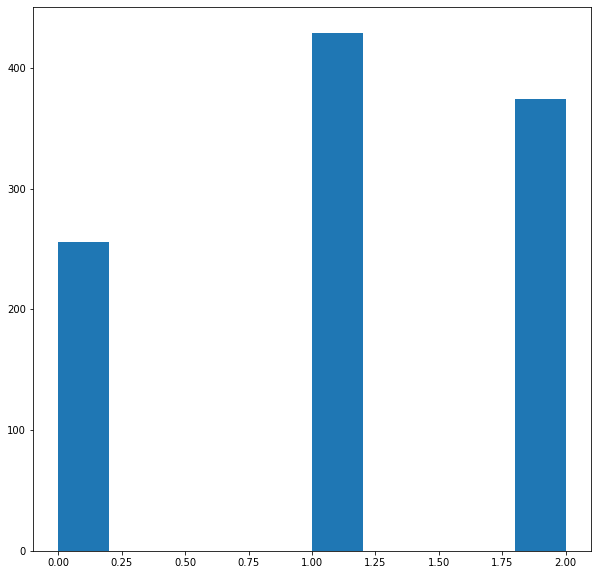

In [ ]:
data['Grade'].hist(figsize=(10,10),grid = False)

In [ ]:
y_test  = y_test_mice_std
predictions = clf_sgd_mode_std_predictions

## Confusion matrix

### From sklearn

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

c_m= confusion_matrix(y_test, predictions)
print(c_m)

[[15 29  8]
 [ 5 75  6]
 [ 4  8 63]]


### Our Confusin matrix


In [ ]:
def out_cf(y_test,predictions):
  return pd.crosstab(y_test,predictions)
out_cf(y_test,predictions)

col_0,0,1,2
Grade,,,
0,15,29,8
1,5,75,6
2,4,8,63


### F1-score

#### F1-score from sklearn

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, predictions, average='macro')

0.6604199893673578

#### Own F1-score

In [ ]:
def our_f1_score(y_test, predictions):
  cm = pd.crosstab(y_test,predictions)
  f1_score = 0
  for i in range(0,y_test.nunique()):
    fp = 0
    fn = 0
    tp = 0
    for j in range(0,y_test.nunique()):
      if i != j:
        fp += cm[i][j]
        fn += cm[j][i]
      else:
        tp = cm [i][j]
    f1 = 2*tp/(2*tp + fp + fn )
    f1_score += f1
  f1_score =  f1_score/y_test.nunique()
  return f1_score

In [ ]:
our_f1_score(y_test, predictions)

0.6604199893673578

## Accuracy

### From sklearn

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.7183098591549296

### Our accuracy 

In [ ]:
def our_accuracy(y_test,predictions):
  cm = pd.crosstab(y_test,predictions)
  cm = cm.to_numpy()
  accuracy = cm.diagonal().sum()/cm.sum()
  return accuracy


In [ ]:
our_accuracy(y_test,predictions)

0.7183098591549296

## Summary

In [ ]:

from prettytable import PrettyTable
 


y_test  = y_test_mice_std

# Specify the Column Names while initializing the Table
myTable = PrettyTable(["", "F1-score", "Accuracy"])
 
# Add rows



predictions = clf_svc_mode_std_predictions
myTable.add_row(["SVC",our_f1_score(y_test, predictions),our_accuracy(y_test,predictions)])

predictions = clf_dt_mode_std_predictions
myTable.add_row(["Decision tree",our_f1_score(y_test, predictions),our_accuracy(y_test,predictions)])

predictions = clf_sgd_mode_std_predictions
myTable.add_row(["SGD",our_f1_score(y_test, predictions),our_accuracy(y_test,predictions)])

predictions = clf_rf_predictions 
myTable.add_row(["Random Forest",our_f1_score(y_test, predictions),our_accuracy(y_test,predictions)])



 
print(myTable)

+---------------+--------------------+--------------------+
|               |      F1-score      |      Accuracy      |
+---------------+--------------------+--------------------+
|      SVC      | 0.8408198803968737 | 0.8450704225352113 |
| Decision tree | 0.9275663275038957 | 0.9342723004694836 |
|      SGD      | 0.6604199893673578 | 0.7183098591549296 |
| Random Forest | 0.9322974101921471 | 0.9389671361502347 |
+---------------+--------------------+--------------------+


# Team teaching

In [ ]:
import time
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier, BaggingClassifier
from sklearn.metrics import f1_score
import xgboost as xgb

In [ ]:
X_train, X_test, y_train, y_test = X_train_mode_std, X_test_mode_std, y_train_mode_std, y_test_mode_std

In [ ]:
def time_measure(func):
        t = time.process_time()
        scores = []
        for i in range(2):
          score = func()
          scores.append(score)
        score = np.array(scores).mean()
        elapsed_time = time.process_time() - t
      
        print("Time: " + str(elapsed_time))
        print("Score: " + str(score))
   

In [ ]:
def svc_clf():
    clf = SVC()
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    return f1_score(y_test, predictions, average='macro')

time_measure(svc_clf)

Time: 0.04549384499999576
Score: 0.8408198803968737


In [ ]:
def sgd_clf():
    clf = SGDClassifier(n_jobs=-1)
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    return f1_score(y_test, predictions, average='macro')

time_measure(sgd_clf)

Time: 0.037663487999999745
Score: 0.7469958315704207


In [ ]:
def dt_clf():
    clf =  DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    return f1_score(y_test, predictions, average='macro')

time_measure(dt_clf)

Time: 0.010484991999994975
Score: 0.9254687138768043


In [ ]:
def rf_clf():
    clf = RandomForestClassifier(n_jobs=-1)
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    return f1_score(y_test, predictions, average='macro')

time_measure(rf_clf)

Time: 0.5976781279999983
Score: 0.9350786505638589


## Voting Classifier

In [ ]:
def voting_classifier():
  clf1 = DecisionTreeClassifier()
  clf2 = RandomForestClassifier(n_jobs=-1)
  clf3 = SVC()

  voting_clf= VotingClassifier(estimators=[('dt', clf1),("rf",clf2),('svc', clf3)], voting = 'hard',n_jobs=-1).fit(X_train, y_train)
  predictions = voting_clf.predict(X_test)
  return f1_score(y_test, predictions, average='macro')

time_measure(voting_classifier)

Time: 0.2124264199999999
Score: 0.9322974101921471


## Stacking Classifier

In [ ]:

def stacking_classifier():

  stacking_clf = StackingClassifier(estimators=[
                                    ('dt',DecisionTreeClassifier()),   
                                    ('rf',RandomForestClassifier(n_jobs=-1))
  ], final_estimator = LogisticRegression(n_jobs=-1), n_jobs=-1).fit(X_train, y_train)

  predictions = stacking_clf.predict(X_test)
  return f1_score(y_test, predictions, average='macro')

time_measure(stacking_classifier)


Time: 0.13574185200000244
Score: 0.9345931485575625


## Bagging Classifier

In [ ]:

def bagging_classifier():

  bagging_clf = BaggingClassifier(
            base_estimator = RandomForestClassifier(n_jobs=-1),
            n_estimators=100,
            oob_score= True,
            bootstrap = True,
            n_jobs = -1).fit(X_train, y_train)
  
  predictions = bagging_clf.predict(X_test)
  return f1_score(y_test, predictions, average='macro')

time_measure(bagging_classifier)

Time: 16.898777771
Score: 0.9376889875447034


## Xgboost

In [ ]:
def xgboost_classifier():

  xga_clf = xgb.XGBClassifier(
                          n_estimators = 100, 
                          n_jobs = -1
                        ).fit(X_train, y_train)
 
  
  predictions = xga_clf.predict(X_test)
  return f1_score(y_test, predictions, average='macro')

time_measure(xgboost_classifier)

Time: 0.402671189000003
Score: 0.948531247450188


All of solutions have similar results (best for Stacking Classifier, which also was the fastest one). The worst one was Bagging Classifier, with the worst score and time

# Optimalization

### Corelation Matrix

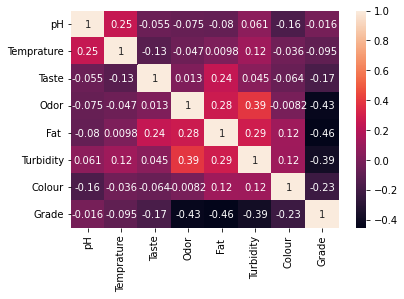

In [ ]:
corrMatrix = data.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f493fe80490>,
      dtype=object)

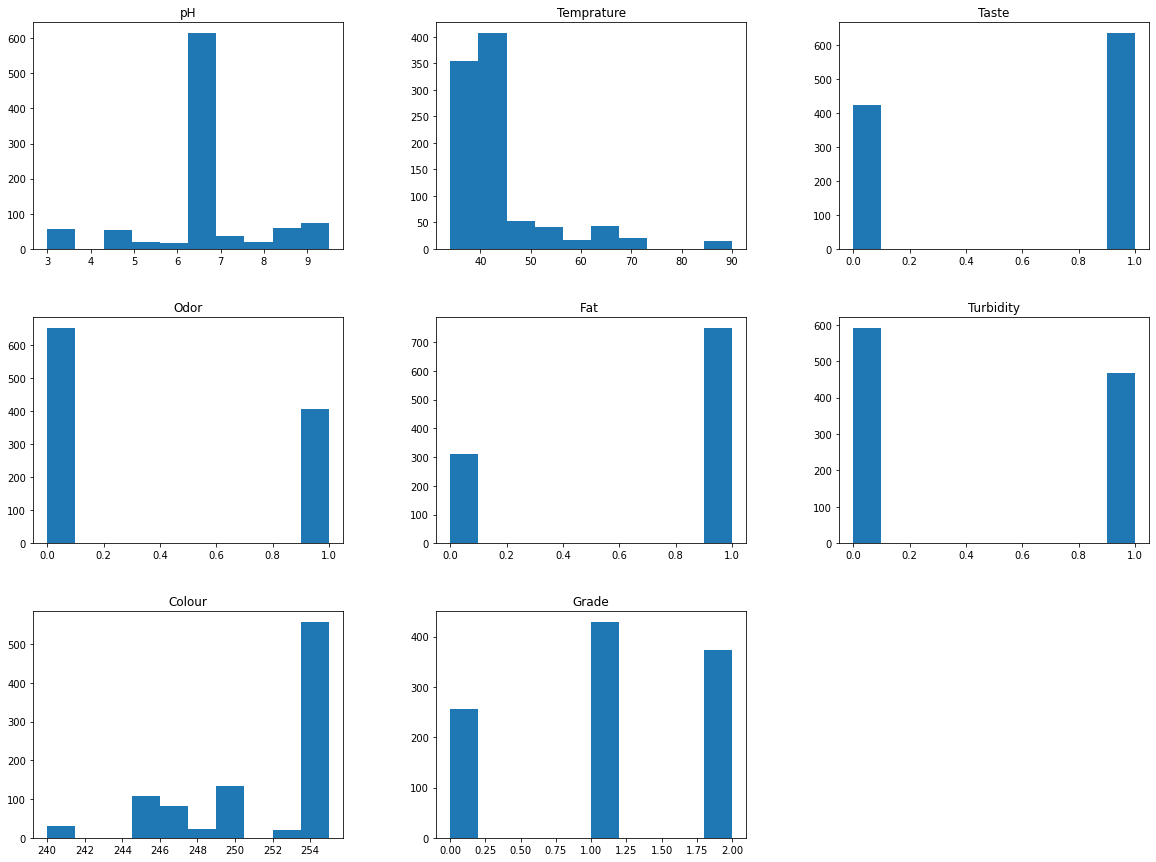

In [ ]:
data.hist(figsize=(20,15),grid = False)

We can observe on the correlation matrix that features pH and Temperature have low correlation coefficients. On the histogram, this is represented as an uneven distribution of values. In the case of Temperature, it is a right-handed graph, and in the case of pH, the vast majority of values are contained in a single bin, which is in the range of 6.25pH - 6.75pH. Therefore, for optimization, we will get rid of the variables ph and Temperature

In [ ]:
def reference_model():
  clf_rf = RandomForestClassifier(random_state=123).fit(X_train_mode_std, y_train_mode_std)
  clf_rf_predictions  = clf_rf.predict(X_test_mode_std)
  return clf_rf.score(X_test_mode_std, y_test_mode_std)

time_measure(reference_model)

Time: 0.6626405359999694
Score: 0.9389671361502347


In [ ]:
data_mode_std_correlation = data_mode_std.drop(['pH', 'Temprature'], axis = 1)
X_train_mode_std_correlation, X_test_mode_std_correlation, y_train_mode_std_correlation, y_test_mode_std_correlation = our_train_test_split(data_mode_std_correlation, test_size = .8)

In [ ]:
def reference_model():
  clf_rf = RandomForestClassifier(random_state=123).fit(X_train_mode_std_correlation, y_train_mode_std_correlation)
  clf_rf_predictions  = clf_rf.predict(X_test_mode_std_correlation)
  return clf_rf.score(X_test_mode_std_correlation, y_test_mode_std_correlation)

time_measure(reference_model)

Time: 0.3659828609999991
Score: 0.704225352112676


After discarding the pH and Temperature parameters, we can see a very small decrease in function execution time and a large decrease in Score by 23%

### Unvariate Testing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.metrics import f1_score
import time
from sklearn.feature_selection import SelectKBest, chi2

In [ ]:
data_opt = pd.read_csv(path_nb +'milknew.csv')
X_opt = data_opt.iloc[:, :-1]
y_opt = data_opt.iloc[:, -1]
X_train_mode_std_opt, X_test_mode_std_opt, y_train_mode_std_opt, y_test_mode_std_opt = our_train_test_split(data_opt, test_size = .8)

In [ ]:
feature_selector = SelectKBest(chi2, k = 5)
fit = feature_selector.fit(X_opt, y_opt)

p_values = pd.DataFrame(fit.pvalues_)
scores = pd.DataFrame(fit.scores_)
input_variable_names = pd.DataFrame(X.columns)
summary_stats = pd.concat([input_variable_names, p_values, scores], axis = 1)
summary_stats.columns = ["input_variable", "p_value", "chi2_score"]
summary_stats.sort_values(by = "p_value", inplace = True)
print(X.columns[fit.get_support(indices=True)])

Index(['Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity'], dtype='object')


In [ ]:
data_mode_std_ut = data_mode_std.drop(['pH', 'Colour'], axis = 1)
X_train_mode_std_ut, X_test_mode_std_ut, y_train_mode_std_ut, y_test_mode_std_ut = our_train_test_split(data_mode_std_ut, test_size = .8)

In [ ]:
def reference_model():
  clf_rf = RandomForestClassifier(random_state=123).fit(X_train_mode_std_ut, y_train_mode_std_ut)
  clf_rf_predictions  = clf_rf.predict(X_test_mode_std_ut)
  return clf_rf.score(X_test_mode_std_ut, y_test_mode_std_ut)

time_measure(reference_model)

Time: 0.3837693140000056
Score: 0.8544600938967136


The SelectKBest function discarded the Colour and pH variables. Rejecting these variables resulted in faster execution times and a small drop in a score of 8%

### Extra Tree Classifier

In [ ]:
etc = ExtraTreesClassifier(random_state=1, n_jobs=-1)
etc.fit(X_train_mode_std_opt, y_train_mode_std_opt)
importances = etc.feature_importances_
print(importances)

[0.36281848 0.24471887 0.03889406 0.08077392 0.08856251 0.11622294
 0.06800923]


In [ ]:
features = []
features_to_drop = []
for ind, value in enumerate(etc.feature_importances_):
    if value > 0.07:
        features.append(X.columns[ind])
    else:
        features_to_drop.append(X.columns[ind])

features

['pH', 'Temprature', 'Odor', 'Fat ', 'Turbidity']

In [ ]:
features_to_drop

['Taste', 'Colour']

In [ ]:
data_mode_std_etc = data_mode_std.drop(features_to_drop, axis = 1)
X_etc = data_mode_std_etc.iloc[:, :-1]
y_etc = data_mode_std_etc.iloc[:, -1]
X_train_etc, X_test_etc, y_train_etc, y_test_etc = train_test_split(X_etc, y_etc, random_state=32, shuffle=True, stratify=y_opt)

In [ ]:
def reference_model():
  clf_rf = RandomForestClassifier(random_state=123).fit(X_train_etc, y_train_etc)
  clf_rf_predictions  = clf_rf.predict(X_test_etc)
  return clf_rf.score(X_test_etc, y_test_etc)

time_measure(reference_model)

Time: 0.4065350759999973
Score: 0.9471698113207547


The Extra Tree Classifier function returned the worst score for the Taste and Colour variables. Discarding these variables resulted in faster execution times and a 1% improvement in score

### RFE

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

regressor = RandomForestClassifier(n_jobs=-1)
feature_selector = RFE(regressor)

fit = feature_selector.fit(X_opt,y_opt)

In [ ]:
optimal_feature_count = feature_selector.n_features_
print(f"Optimal numer of features: {optimal_feature_count}")

columns_to_drop = X.columns[np.invert(fit.get_support())]


data_mode_std_rfe = data_mode_std.drop(features_to_drop, axis = 1)
X_rfe = data_mode_std_rfe.iloc[:, :-1]
y_rfe = data_mode_std_rfe.iloc[:, -1]
X_train_rfe, X_test_rfe, y_train_rfe, y_test_rfe = train_test_split(X_rfe, y_rfe, random_state=32, shuffle=True, stratify=y_opt)

Optimal numer of features: 3


In [ ]:
columns_to_drop

Index(['Taste', 'Odor', 'Turbidity', 'Colour'], dtype='object')

In [ ]:
def reference_model():
  clf_rf = RandomForestClassifier(random_state=123).fit(X_train_rfe, y_train_rfe)
  clf_rf_predictions  = clf_rf.predict(X_test_rfe)
  return clf_rf.score(X_test_rfe, y_test_rfe)

time_measure(reference_model)

Time: 0.396889036999994
Score: 0.9471698113207547


The RFE function rejected Taste, Odor, Turbidity, and Color. Rejecting these variables resulted in faster execution times and a 1% improvement in score

### Genetic algorithm

## Hyperparameter optimization

### Grid Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 10, stop = 2000, num = 10)]
max_depth = [int(x) for x in np.linspace(2, 70, num = 11)]
max_features = ['auto', 'sqrt']
min_samples_split = [2, 4, 6]
min_samples_leaf = [1, 2, 3]
bootstrap = [True, False]
max_depth.append(None)

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [10, 231, 452, 673, 894, 1115, 1336, 1557, 1778, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 8, 15, 22, 29, 36, 42, 49, 56, 63, 70, None], 'min_samples_split': [2, 4, 6], 'min_samples_leaf': [1, 2, 3], 'bootstrap': [True, False]}


In [ ]:
rf = RandomForestClassifier(random_state=1, n_jobs=-1)
rf_random = RandomizedSearchCV(estimator = rf, 
                               param_distributions = random_grid, 
                               n_iter = 10, cv = 3, 
                               verbose=5, 
                               random_state=123, 
                               n_jobs = 1)
rf_random.fit(X_train_etc, y_train_etc)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END bootstrap=False, max_depth=49, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=452;, score=0.917 total time=   0.6s
[CV 2/3] END bootstrap=False, max_depth=49, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=452;, score=0.928 total time=   0.7s
[CV 3/3] END bootstrap=False, max_depth=49, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=452;, score=0.928 total time=   0.7s
[CV 1/3] END bootstrap=False, max_depth=49, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=894;, score=0.917 total time=   1.2s
[CV 2/3] END bootstrap=False, max_depth=49, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=894;, score=0.928 total time=   1.2s
[CV 3/3] END bootstrap=False, max_depth=49, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=894;, score=0.928 total time=   1.2s
[CV 1/3] END bo

RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=1),
                   n_jobs=1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 8, 15, 22, 29, 36, 42,
                                                      49, 56, 63, 70, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 231, 452, 673, 894,
                                                         1115, 1336, 1557, 1778,
                                                         2000]},
                   random_state=123, verbose=5)

In [ ]:
rf_random.best_params_

{'n_estimators': 452,
 'min_samples_split': 4,
 'min_samples_leaf': 3,
 'max_features': 'sqrt',
 'max_depth': 49,
 'bootstrap': False}

In [ ]:
best_params_rf_random = {'n_estimators': 452,
 'min_samples_split': 4,
 'min_samples_leaf': 3,
 'max_features': 'sqrt',
 'max_depth': 49,
 'bootstrap': False}

In [ ]:
def reference_model():
  clf_rf = RandomForestClassifier(random_state=123, **best_params_rf_random).fit(X_train_etc, y_train_etc)
  clf_rf_predictions  = clf_rf.predict(X_test_etc)
  return clf_rf.score(X_test_etc, y_test_etc)

time_measure(reference_model)

Time: 1.3479685249999989
Score: 0.9358490566037736


The hyperparameters from Grid Search resulted in a relatively large time pattern and no score improvement compared to the results after ETC

### Optuna

In [ ]:
# !pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 348 kB 4.2 MB/s 
     |████████████████████████████████| 81 kB 6.7 MB/s 
     |████████████████████████████████| 210 kB 57.7 MB/s 
     |████████████████████████████████| 78 kB 6.6 MB/s 
     |████████████████████████████████| 50 kB 5.3 MB/s 
     |████████████████████████████████| 147 kB 39.2 MB/s 
     |████████████████████████████████| 112 kB 64.1 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11136 sha256=52fbfac0deed373dd500cd9d73cc716c21838e01a242d302cc6acde70d84f365
  Stored in directory: /root/.cache/pip/wheels/7f/1a/65/84ff8c386bec21fca6d220ea1f5498a0367883a78dd5ba6122
Successfully built pyperclip
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 5.1.0
    Uninstalling importlib-metadata-5.1.0:
      Successfully uninstalled importlib-metadata-5.1.0


In [ ]:
from optuna.study import create_study

def objective(trial):
    rf_max_depth = trial.suggest_int("rf_max_depth", 2, 50, log=True)
    rf_min_samples_split = trial.suggest_int("rf_min_samples_split", 2, 50, log=True)
    rf_min_samples_leaf = trial.suggest_int("rf_min_samples_leaf", 2, 50, log=True)
    rf_n_estimators = trial.suggest_int("rf_n_estimators", 10, 1000, log=True)
    rf_bootstrap = trial.suggest_categorical("rf_bootstrap", ['True', 'False'])
    rf_criterion = trial.suggest_categorical("rf_criterion", ['gini', 'entropy'])

    classifier_obj = RandomForestClassifier(
        max_depth=rf_max_depth, min_samples_split=rf_min_samples_split, min_samples_leaf=rf_min_samples_leaf,
        n_estimators=rf_n_estimators, bootstrap=rf_bootstrap, criterion=rf_criterion, random_state=123, n_jobs=-1
    )

    classifier_obj.fit(X_train_etc, y_train_etc)
    acc = classifier_obj.score(X_test_etc, y_test_etc)

    return acc

study = create_study(direction="maximize")
study.optimize(objective, n_trials=200, n_jobs=2)
print(study.best_trial)

[I 2022-12-19 22:07:51,642] A new study created in memory with name: no-name-a21c8e83-a7a6-4e2c-ae20-a68442d2c0d1
[I 2022-12-19 22:07:52,531] Trial 0 finished with value: 0.9018867924528302 and parameters: {'rf_max_depth': 45, 'rf_min_samples_split': 2, 'rf_min_samples_leaf': 37, 'rf_n_estimators': 109, 'rf_bootstrap': 'False', 'rf_criterion': 'entropy'}. Best is trial 0 with value: 0.9018867924528302.
[I 2022-12-19 22:07:54,160] Trial 2 finished with value: 0.939622641509434 and parameters: {'rf_max_depth': 6, 'rf_min_samples_split': 42, 'rf_min_samples_leaf': 10, 'rf_n_estimators': 228, 'rf_bootstrap': 'False', 'rf_criterion': 'gini'}. Best is trial 2 with value: 0.939622641509434.
[I 2022-12-19 22:07:54,490] Trial 3 finished with value: 0.8377358490566038 and parameters: {'rf_max_depth': 11, 'rf_min_samples_split': 6, 'rf_min_samples_leaf': 48, 'rf_n_estimators': 30, 'rf_bootstrap': 'True', 'rf_criterion': 'gini'}. Best is trial 2 with value: 0.939622641509434.
[I 2022-12-19 22:07:5

FrozenTrial(number=40, values=[0.9660377358490566], datetime_start=datetime.datetime(2022, 12, 19, 22, 8, 12, 299407), datetime_complete=datetime.datetime(2022, 12, 19, 22, 8, 13, 313082), params={'rf_max_depth': 31, 'rf_min_samples_split': 2, 'rf_min_samples_leaf': 12, 'rf_n_estimators': 130, 'rf_bootstrap': 'False', 'rf_criterion': 'gini'}, distributions={'rf_max_depth': IntDistribution(high=50, log=True, low=2, step=1), 'rf_min_samples_split': IntDistribution(high=50, log=True, low=2, step=1), 'rf_min_samples_leaf': IntDistribution(high=50, log=True, low=2, step=1), 'rf_n_estimators': IntDistribution(high=1000, log=True, low=10, step=1), 'rf_bootstrap': CategoricalDistribution(choices=('True', 'False')), 'rf_criterion': CategoricalDistribution(choices=('gini', 'entropy'))}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=40, state=TrialState.COMPLETE, value=None)


In [ ]:
params={'max_depth': 31, 'min_samples_split': 2, 'min_samples_leaf': 12, 'n_estimators': 130, 'bootstrap': 'False', 'criterion': 'gini'}

def reference_model():
  clf_rf = RandomForestClassifier(random_state=123, **params).fit(X_train_etc, y_train_etc)
  clf_rf_predictions  = clf_rf.predict(X_test_etc)
  return clf_rf.score(X_test_etc, y_test_etc)

time_measure(reference_model)

Time: 0.4817801739999936
Score: 0.9660377358490566


Using feature optimization, we were able to get the best result for Extra Tree Classifier which discarded the Taste and Color variables. We can observe a slight improvement over time and a score improvement of 1%.

With the help of the optuna bilbiote, we selected hyperparameters that have no effect on time and improve the score compared to ETC by 2%.